In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import chi2


In [2]:
df=pd.read_csv(r'C:\Users\KrishnaBalram\Desktop\masai\ML\datasets\hyundi.csv')
df.head()

,model,year,price,transmission,mileage,fuelType,tax(£),mpg,engineSize
0,I20,2017,7999,Manual,17307,Petrol,145,58.9,1.2
1,Tucson,2016,14499,Automatic,25233,Diesel,235,43.5,2.0
2,Tucson,2016,11399,Manual,37877,Diesel,30,61.7,1.7
3,I10,2016,6499,Manual,23789,Petrol,20,60.1,1.0
4,IX35,2015,10199,Manual,33177,Diesel,160,51.4,2.0


### size

In [3]:
df.shape

(4860, 9)

### treat missing values

In [4]:
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax(£)          0
mpg             0
engineSize      0
dtype: int64

### Check column types and describe which columns are numerical or categorical

In [5]:
df.dtypes

model            object
year              int64
price             int64
transmission     object
mileage           int64
fuelType         object
tax(£)            int64
mpg             float64
engineSize      float64
dtype: object

In [6]:
df.price.describe()

count     4860.00000
mean     12750.13107
std       5992.92231
min       1200.00000
25%       8000.00000
50%      11990.00000
75%      15733.75000
max      92000.00000
Name: price, dtype: float64

In [7]:
categorical=df.describe(include='object').columns
categorical

Index(['model', 'transmission', 'fuelType'], dtype='object')

In [8]:
numerical=df.describe(include=[np.number]).columns
numerical

Index(['year', 'price', 'mileage', 'tax(£)', 'mpg', 'engineSize'], dtype='object')

In [9]:
ls= df.columns

for i in ls:
    print('-----------------')
    print(i)
    print(df[i].value_counts())

-----------------
model
 Tucson      1300
 I10         1092
 I30          536
 I20          496
 Kona         328
 Ioniq        284
 Santa Fe     245
 IX20         204
 I40          127
 IX35         118
 I800         117
 Getz           6
 Veloster       3
 Terracan       2
 Accent         1
 Amica          1
Name: model, dtype: int64
-----------------
year
2017    1178
2019    1086
2018     987
2016     716
2015     333
2014     185
2020     159
2013     120
2010      25
2012      22
2011      19
2009      13
2007       6
2008       4
2003       3
2000       1
2005       1
2002       1
2006       1
Name: year, dtype: int64
-----------------
price
7995     55
15498    52
8995     43
7495     40
9995     39
         ..
33495     1
30995     1
5910      1
11260     1
13994     1
Name: price, Length: 1685, dtype: int64
-----------------
transmission
Manual       3611
Automatic     669
Semi-Auto     578
Other           2
Name: transmission, dtype: int64
-----------------
mileage
10       

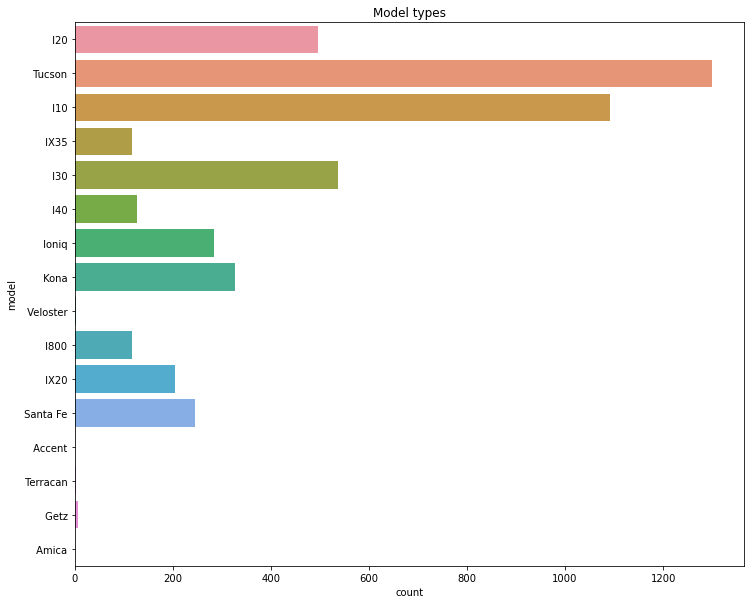

In [10]:
#MOdel Count

plt.figure(figsize=(12,10))
sns.countplot(y='model', data=df)
plt.title('Model types')
plt.show()

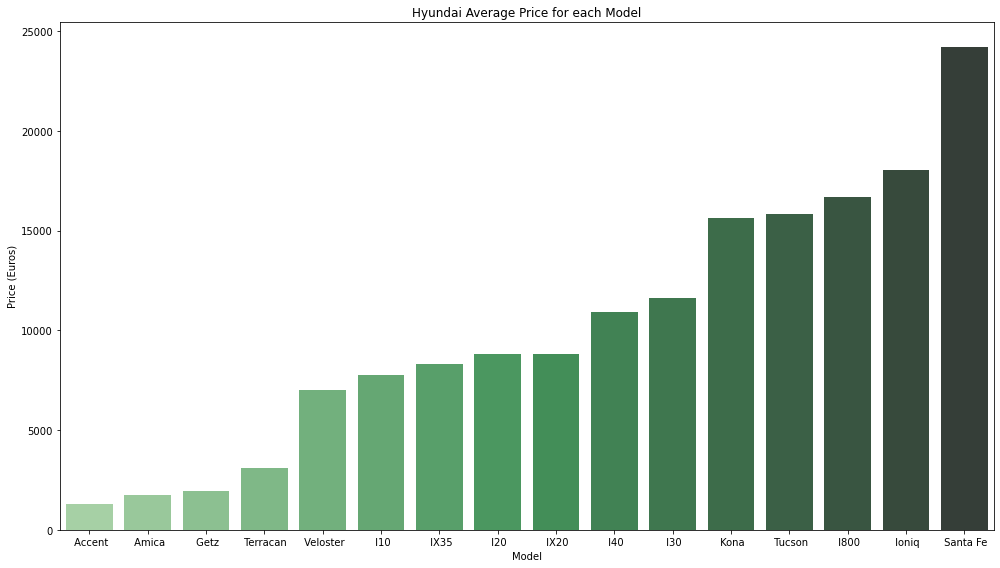

In [11]:
model_price = df.groupby('model')['price'].mean().sort_values()

plt.figure(figsize=(14, 8))
plt.title("Hyundai Average Price for each Model")
pal = sns.color_palette("Greens_d", len(model_price))

sns.barplot(x=model_price.index, y=model_price.values, palette=pal)

plt.xlabel("Model")
plt.ylabel("Price (Euros)")
plt.tight_layout()
plt.savefig("output.png")

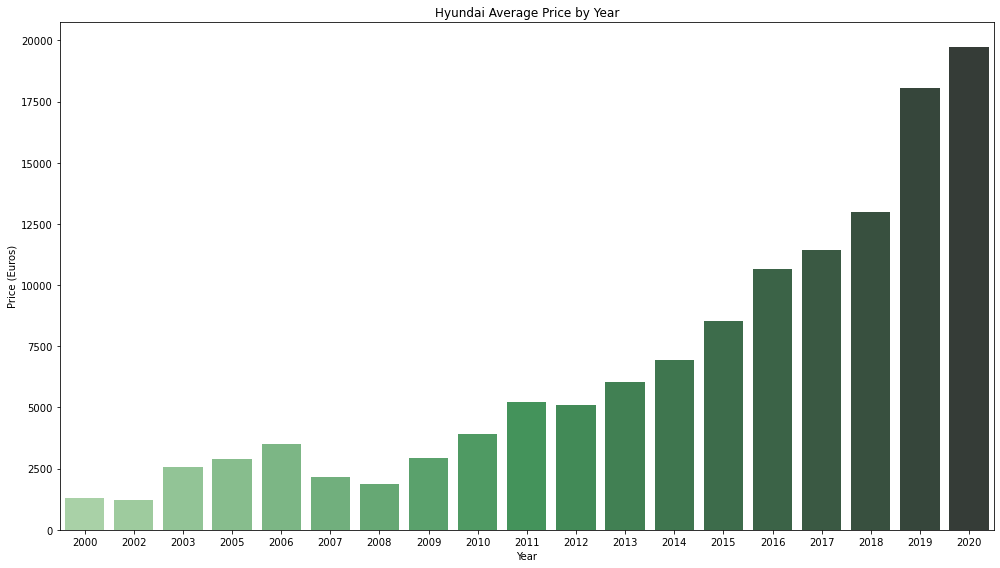

In [12]:
year_price = df.groupby('year')['price'].mean().sort_values()

plt.figure(figsize=(14, 8))
plt.title("Hyundai Average Price by Year")
pal = sns.color_palette("Greens_d", len(year_price))

sns.barplot(x=year_price.index, y=year_price.values, palette=pal)

plt.xlabel("Year")
plt.ylabel("Price (Euros)")
plt.tight_layout()
plt.savefig("output.png")

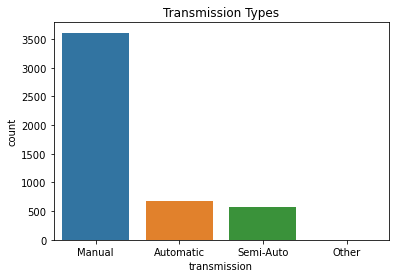

In [13]:
# Higher Transmission Preference 
sns.countplot(x='transmission', data=df)
plt.title('Transmission Types')
plt.show()

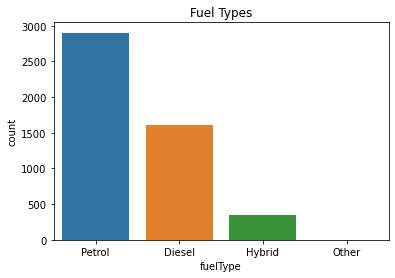

In [14]:
# Most Fuel type preference 

sns.countplot(x='fuelType', data=df)
plt.title('Fuel Types')
plt.show()

<AxesSubplot:xlabel='transmission', ylabel='price'>

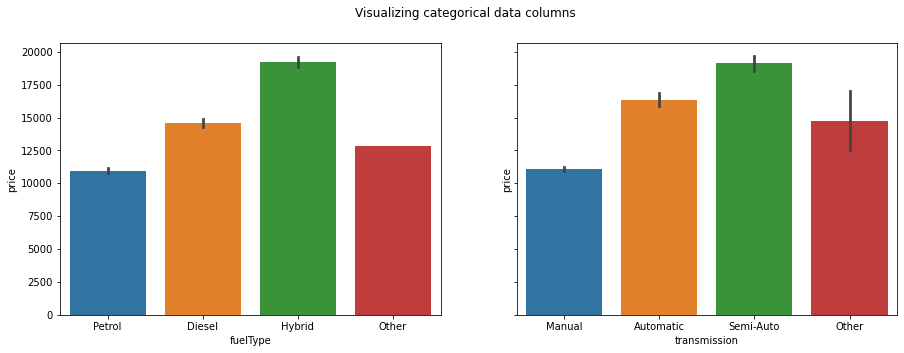

In [15]:
#Visualizing categorical data columns
fuelType = df['fuelType']
transmission = df['transmission']
price = df['price']
fig, axes = plt.subplots(1,2, figsize=(15,5), sharey=True)
fig.suptitle('Visualizing categorical data columns')
sns.barplot(x=fuelType, y=price, ax=axes[0])
sns.barplot(x=transmission, y=price, ax = axes[1])

### Univariate analysis

### 1.  Calculate mean, median, std dev, and quartiles

In [16]:
df.describe(include=[np.number])

,year,price,mileage,tax(£),mpg,engineSize
count,4860.000000,4860.00000,4860.000000,4860.000000,4860.000000,4860.000000
mean,2017.107613,12750.13107,21486.049588,121.147119,53.827798,1.457922
std,1.920456,5992.92231,17710.196964,58.003289,12.736042,0.400788
min,2000.000000,1200.00000,1.000000,0.000000,1.100000,0.000000
25%,2016.000000,8000.00000,8339.250000,125.000000,44.800000,1.200000
50%,2017.000000,11990.00000,17462.000000,145.000000,55.400000,1.600000
75%,2019.000000,15733.75000,30967.000000,145.000000,60.100000,1.700000
max,2020.000000,92000.00000,138000.000000,555.000000,256.800000,2.900000


### Plot histogram for a few categorical variables

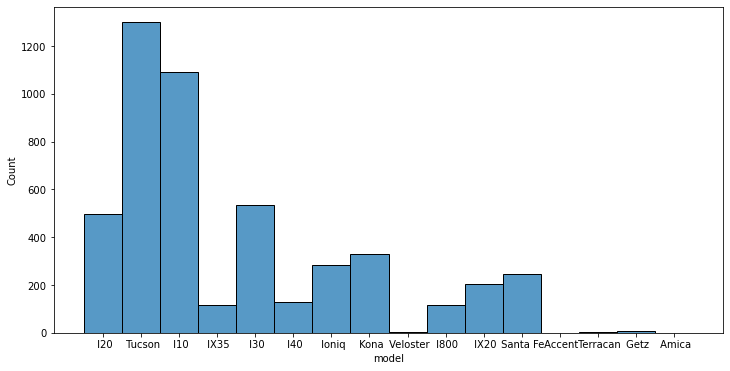

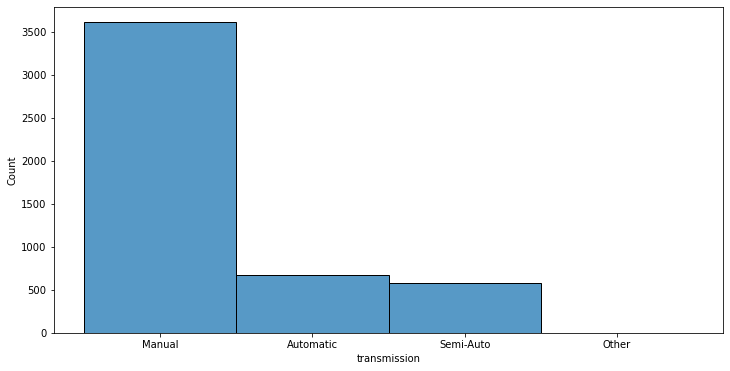

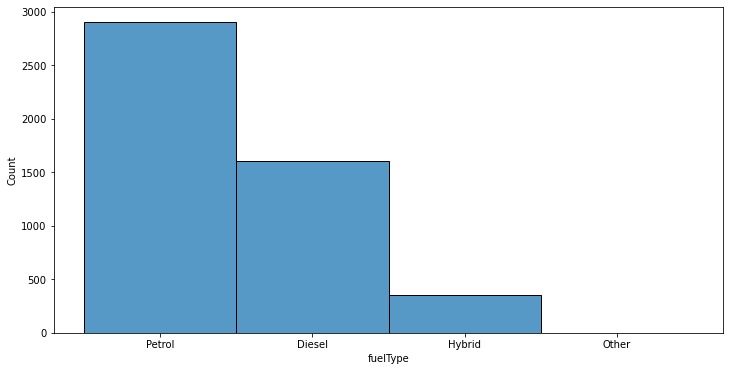

In [17]:
for i in categorical:
    plt.figure(figsize=(12, 6)) 
    sns.histplot(df[i]) 
    plt.show()

### Check the distribution of numerical variables and comment on it

year


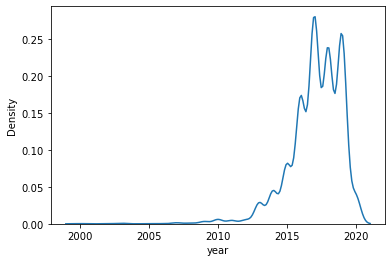

----------------------------------------------------
price


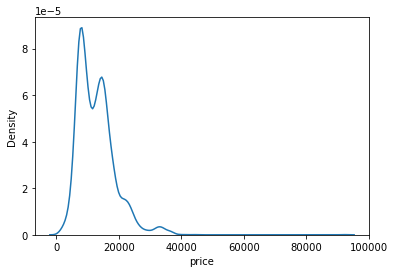

----------------------------------------------------
mileage


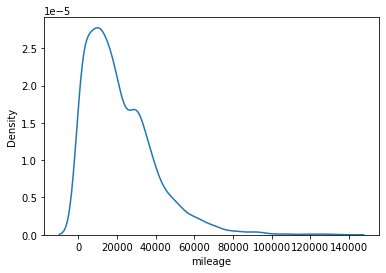

----------------------------------------------------
tax(£)


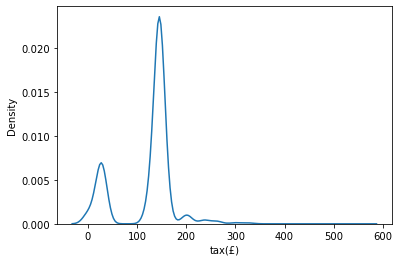

----------------------------------------------------
mpg


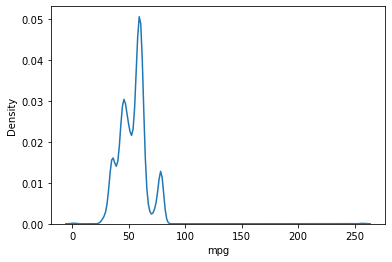

----------------------------------------------------
engineSize


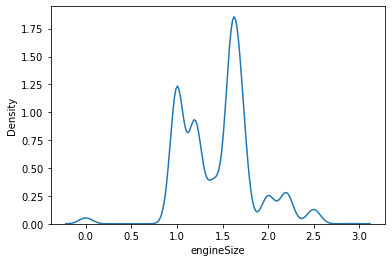

----------------------------------------------------


In [18]:
for i in numerical:
    print(i)       
    sns.kdeplot(df[i])
    plt.show()
    
    print('----------------------------------------------------') 

<AxesSubplot:xlabel='mileage', ylabel='price'>

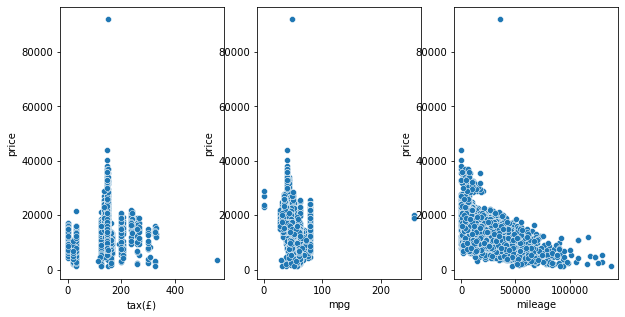

In [19]:
plt.figure(figsize=(10,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df['tax(£)'],y=df.price)

plt.subplot(1,3,2)
sns.scatterplot(x=df.mpg,y=df.price)

plt.subplot(1,3,3)
sns.scatterplot(x=df.mileage,y=df.price)

Mileage and mpg seem to have a negative correlation with price.
Tax doesn't show any trend.

### Bivariate analysis

### Plot pair plots

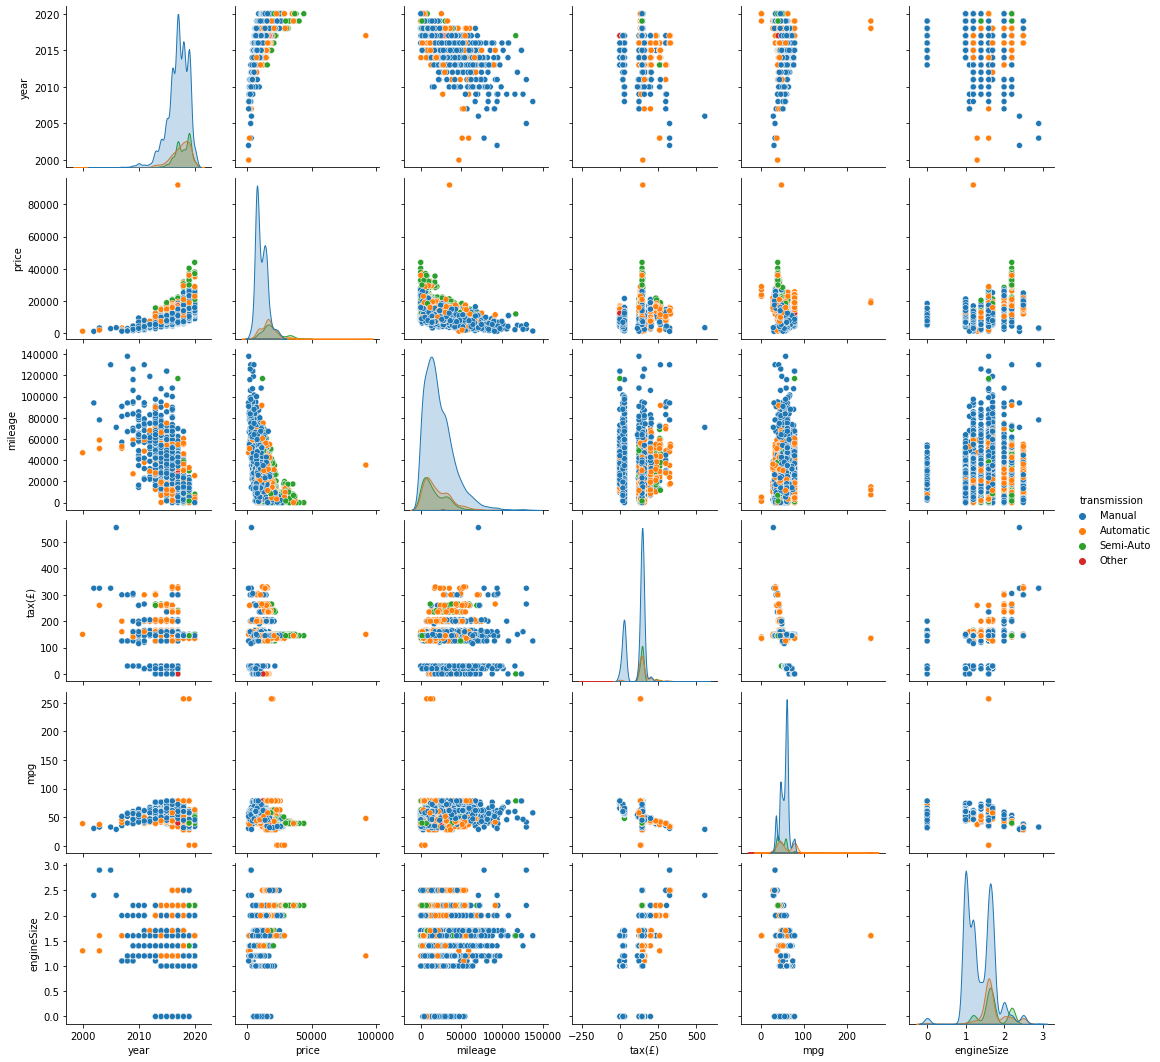

In [20]:
sns.pairplot(df, hue ='transmission')
plt.show()

### Chi-square analysis

### transmission and fuelType

In [21]:
from scipy.stats import chi2_contingency
  
# defining the table
data = pd.crosstab(df['transmission'],df['fuelType'])
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('cols r Dependent (reject H0)')
else:
    print('cols r Independent (H0 holds true)')

p value is 0.0
cols r Dependent (reject H0)


### fuelType and model

In [22]:
from scipy.stats import chi2_contingency
  
# defining the table
data = pd.crosstab(df['fuelType'],df['model'],)
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('cols r Dependent (reject H0)')
else:
    print('cols r Independent (H0 holds true)')

p value is 0.0
cols r Dependent (reject H0)


### Pearson correlation, and plot their heatmap

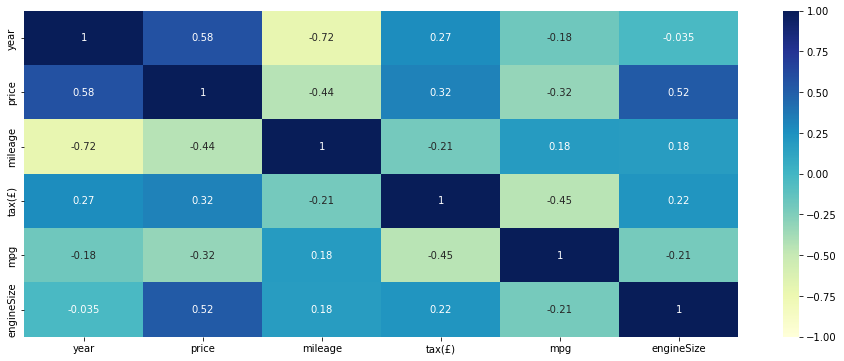

In [23]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True,vmin=-1, vmax=1)
plt.show()

<AxesSubplot:title={'center':'Correlation between year and price'}, xlabel='price', ylabel='year'>

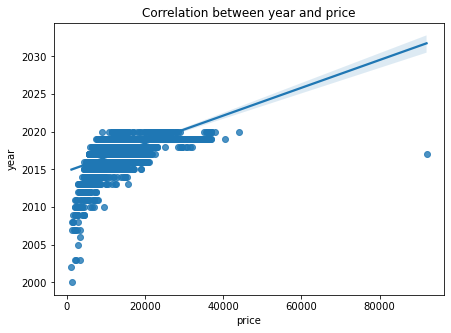

In [24]:
#Correlation between year and price

fig = plt.figure(figsize=(7,5))
plt.title('Correlation between year and price')
sns.regplot(x='price', y='year', data=df)

### Drop any unnecessary columns

In [25]:
df.drop(['model'], axis=1,inplace=True)

### One hot encode categorical variables 

In [26]:
import category_encoders as ce
enc = ce.OneHotEncoder(cols=['transmission','fuelType'], return_df=True)
df = enc.fit_transform(df)

In [27]:
df = df.reset_index(drop=True)

In [28]:
df.head()

,year,price,transmission_1,transmission_2,transmission_3,transmission_4,mileage,fuelType_1,fuelType_2,fuelType_3,fuelType_4,tax(£),mpg,engineSize
0,2017,7999,1,0,0,0,17307,1,0,0,0,145,58.9,1.2
1,2016,14499,0,1,0,0,25233,0,1,0,0,235,43.5,2.0
2,2016,11399,1,0,0,0,37877,0,1,0,0,30,61.7,1.7
3,2016,6499,1,0,0,0,23789,1,0,0,0,20,60.1,1.0
4,2015,10199,1,0,0,0,33177,0,1,0,0,160,51.4,2.0


In [29]:
df.shape

(4860, 14)

### Split into train and test set

In [30]:
x = df.drop('price',axis=1)
y = df['price']

In [31]:
print(x.shape)
print(y.shape)

(4860, 13)
(4860,)


In [32]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=51)

#### Scale the variables`

In [33]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
inputs = ['year','price','mileage','tax(£)','mpg','engineSize']
df[inputs] = mms.fit_transform(df[inputs])
df.head()

,year,price,transmission_1,transmission_2,transmission_3,transmission_4,mileage,fuelType_1,fuelType_2,fuelType_3,fuelType_4,tax(£),mpg,engineSize
0,0.85,0.074879,1,0,0,0,0.125407,1,0,0,0,0.261261,0.226046,0.413793
1,0.80,0.146465,0,1,0,0,0.182842,0,1,0,0,0.423423,0.165819,0.689655
2,0.80,0.112324,1,0,0,0,0.274466,0,1,0,0,0.054054,0.236996,0.586207
3,0.80,0.058359,1,0,0,0,0.172378,1,0,0,0,0.036036,0.230739,0.344828
4,0.75,0.099108,1,0,0,0,0.240408,0,1,0,0,0.288288,0.196715,0.689655


## Linear regression, Decision Tree, Random Forest, SVR

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

### TRAING DATA

In [36]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def model_train(x_train,y_train):
  all_models = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),SVR()]
  scores = []
  for i in all_models:
    model = i
    model.fit(x_train,y_train)
    y_predicted = model.predict(x_train)
    mse = mean_squared_error(y_train,y_predicted)
    mae = mean_absolute_error(y_train,y_predicted)
    
    scores.append({
        'model': i,
        'best_score':model.score(x_train,y_train),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
    })
  return pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])

model_train(x_train,y_train)

,model,best_score,mean_squared_error,mean_absolute_error
0,LinearRegression(),0.758889,8.587504e+06,1840.365734
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.983777,5.778032e+05,347.095912
2,DecisionTreeRegressor(),0.999212,2.807542e+04,20.190805
3,SVR(),0.015468,3.506554e+07,4480.501950


### TESTING DATA

In [37]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
def model_test(x_test,y_test):
  all_models = [LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),SVR()]
  scores = []
  for i in all_models:
    model = i
    model.fit(x_test,y_test)
    y_predicted = model.predict(x_test)
    mse = mean_squared_error(y_test,y_predicted)
    mae = mean_absolute_error(y_test,y_predicted)
    scores.append({
        'model': i,
        'best_score':model.score(x_test,y_test),
        'mean_squared_error':mse,
        'mean_absolute_error':mae
        })
  return pd.DataFrame(scores,columns=['model','best_score','mean_squared_error','mean_absolute_error'])


model_test(x_test,y_test)

,model,best_score,mean_squared_error,mean_absolute_error
0,LinearRegression(),0.768865,8.556829e+06,2132.276934
1,"(DecisionTreeRegressor(max_features='auto', ra...",0.991174,3.267435e+05,386.789700
2,DecisionTreeRegressor(),0.999959,1.517211e+03,2.861797
3,SVR(),-0.013279,3.751258e+07,4624.555950


### Based on Above Observation we can say Decision Tree model is the best model for our data

### Visualization Of Predicted Model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(x_test,y_test)
y_predicted = model.predict(x_test)

plt.figure(figsize=(10,8))
plt.title('Truth vs Predicted',fontsize=25)
sns.scatterplot(x = y_test,y = y_predicted)      
plt.xlabel('Truth', fontsize=18)                          
plt.ylabel('Predicted', fontsize=16)   

## Hypertuning Grid search CV

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5,10, None], 'max_features': ['auto', 'log2'],
              'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

In [ ]:
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

In [ ]:
g_search.fit(x_train, y_train);

print(g_search.best_params_)

In [ ]:
print(g_search.score(x_test, y_test))

# Train a polynomial regression model with degrees 2, and 3 and compare its performance with other models 


In [ ]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))

In [ ]:
poly = PolynomialFeatures(degree=3, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)
print(r2_score(y_test, y_pred))